In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/titanic_clean.csv')
print(df.shape)

df.info()


(891, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
supervivientes = 342
fallecidos = 549

total = supervivientes + fallecidos

porc_supervivientes = (supervivientes / total) * 100

print(f'Porcentaje de supervivientes: {porc_supervivientes:.2f}%')

Porcentaje de supervivientes: 38.38%


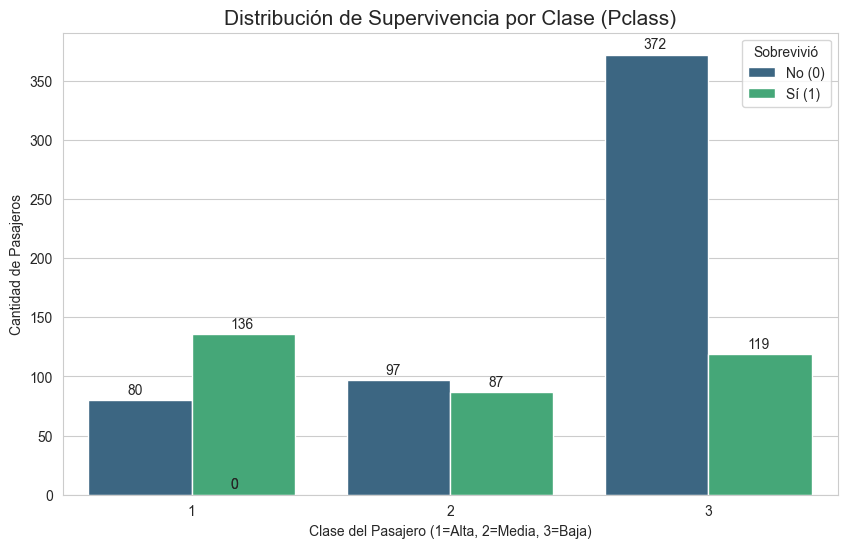

In [24]:

# Configuramos el estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Creamos la gráfica de barras
# 'x' es la clase del pasajero
# 'hue' separa las barras por la variable Survived
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')

# Personalizamos etiquetas y título
plt.title('Distribución de Supervivencia por Clase (Pclass)', fontsize=15)
plt.xlabel('Clase del Pasajero (1=Alta, 2=Media, 3=Baja)')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No (0)', 'Sí (1)'])

# (Opcional) Añadir etiquetas de valor sobre las barras para mayor precisión
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.15, p.get_height()+5))

plt.show()

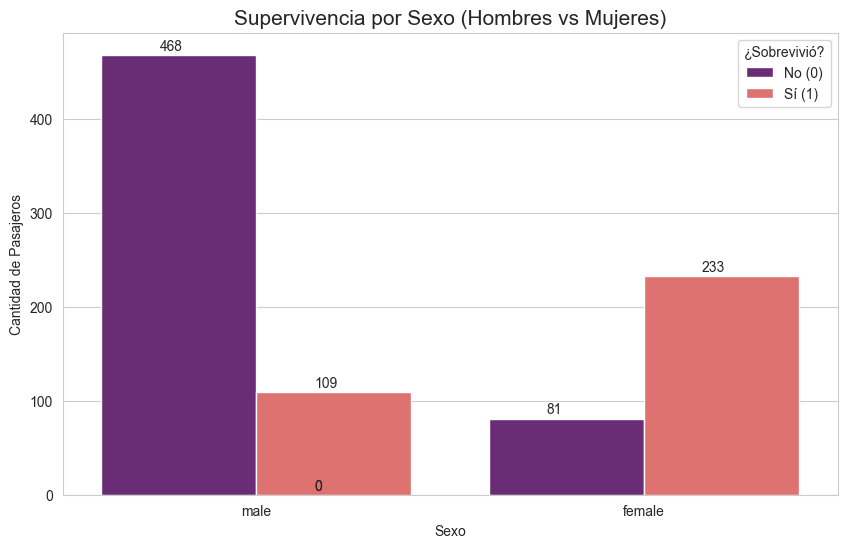

In [25]:


# Configuramos el estilo y el tamaño
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Creamos la gráfica de barras agrupada
# x='Sex' para comparar hombres y mujeres
# hue='Survived' para ver quién vivió y quién no
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='magma')

# Personalizamos la estética
plt.title('Supervivencia por embarque', fontsize=15)
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='¿Sobrevivió?', labels=['No (0)', 'Sí (1)'])

# Añadimos las cantidades sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.15, p.get_height()+5))

plt.show()

/var/folders/mb/z9zjwm1x7jx8j257pq6v5fyh0000gn/T/ipykernel_36841/3790047694.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
/var/folders/mb/z9zjwm1x7jx8j257pq6v5fyh0000gn/T/ipykernel_36841/3790047694.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='cubehelix', ax=axes[1])
/var/folders/mb/z9zjwm1x7jx8j257pq6v5fyh0000gn/T/ipykernel_36841/3790047694.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])


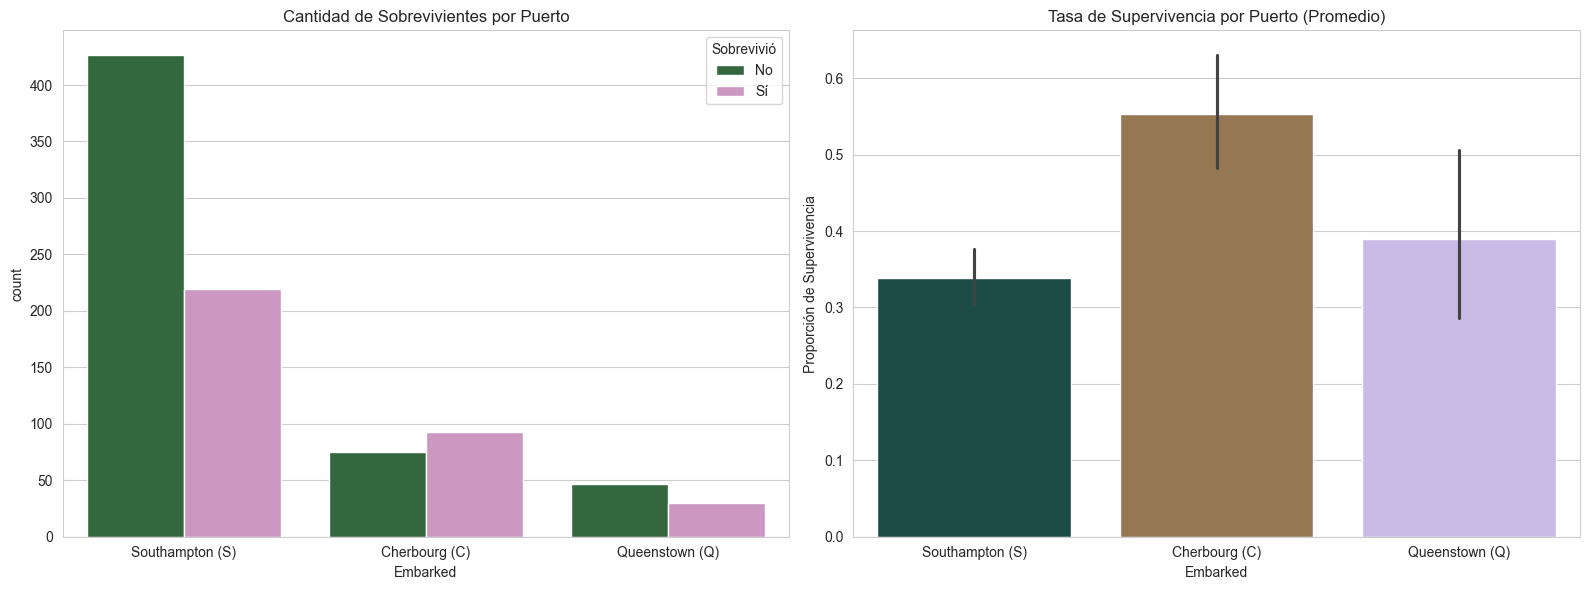

In [26]:


# Configuramos una figura con dos subgráficos (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Gráfica de Conteo (Frecuencia absoluta)
sns.countplot(x='Embarked', hue='Survived', data=df, palette='cubehelix', ax=axes[0])
axes[0].set_title('Cantidad de Sobrevivientes por Puerto')
axes[0].set_xticklabels(['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
axes[0].legend(title='Sobrevivió', labels=['No', 'Sí'])

# 2. Gráfica de Tasa de Supervivencia (Promedio / Porcentaje)
sns.barplot(x='Embarked', y='Survived', data=df, palette='cubehelix', ax=axes[1])
axes[1].set_title('Tasa de Supervivencia por Puerto (Promedio)')
axes[1].set_xticklabels(['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
axes[1].set_ylabel('Proporción de Supervivencia')

plt.tight_layout()
plt.show()

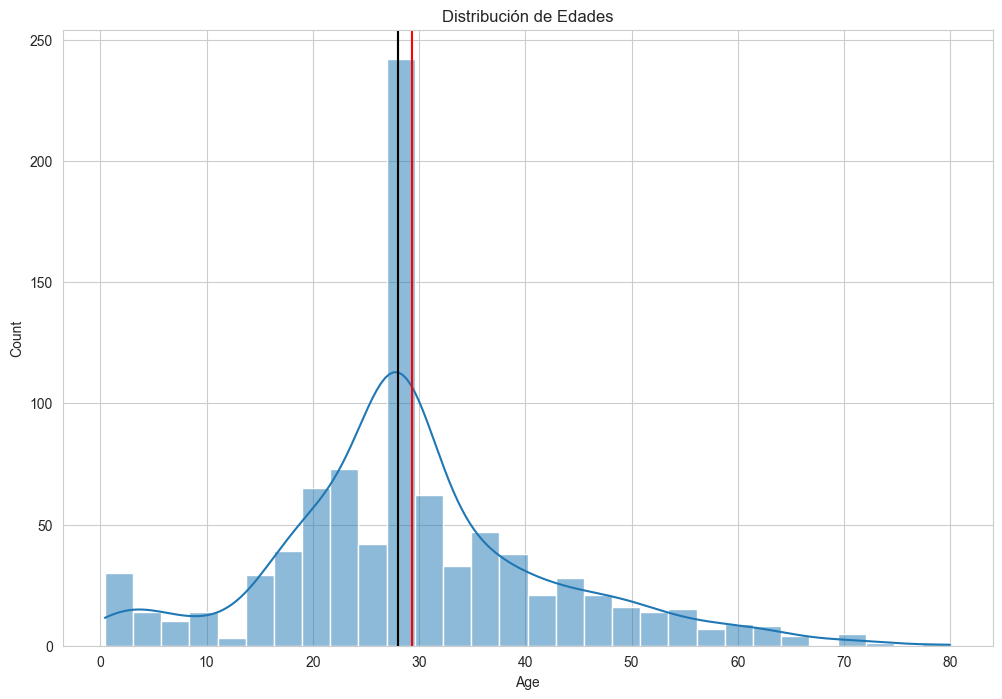

Media: 29.36158249158249
Mediana: 28.0
Moda: 28.0


In [27]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

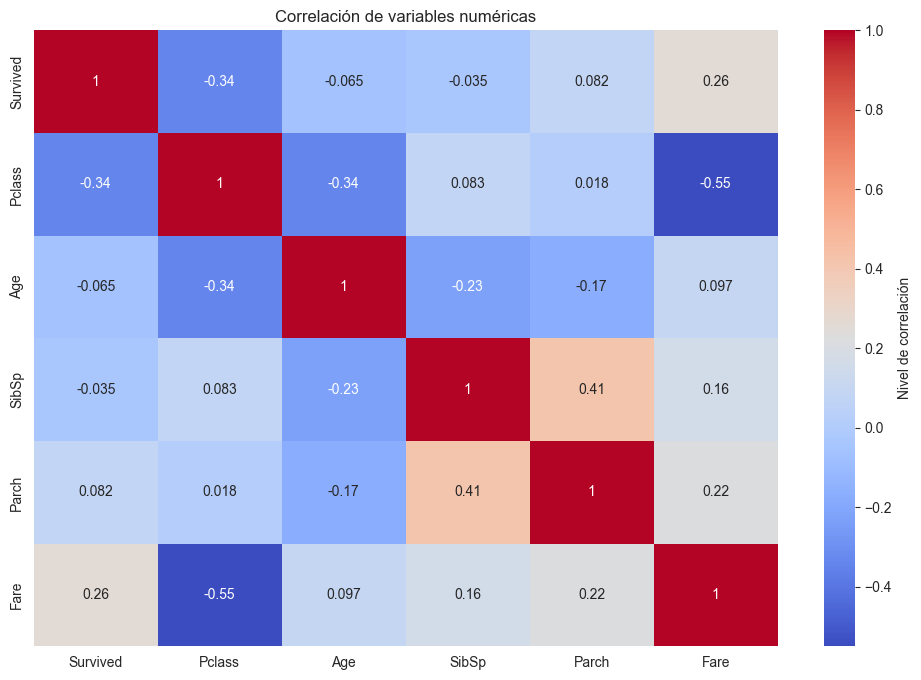

In [28]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

/var/folders/mb/z9zjwm1x7jx8j257pq6v5fyh0000gn/T/ipykernel_36841/3189221644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='coolwarm')


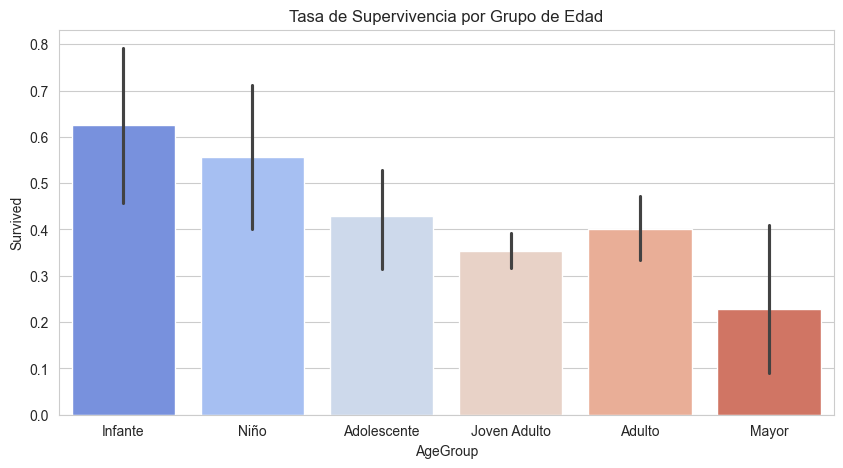

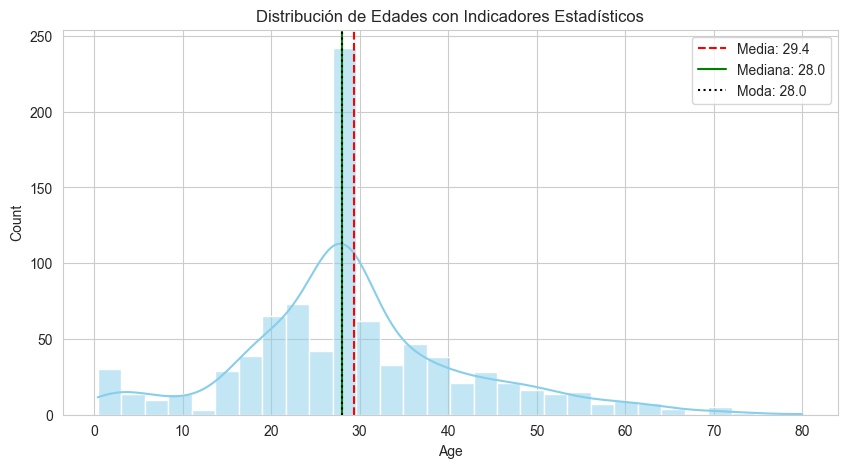

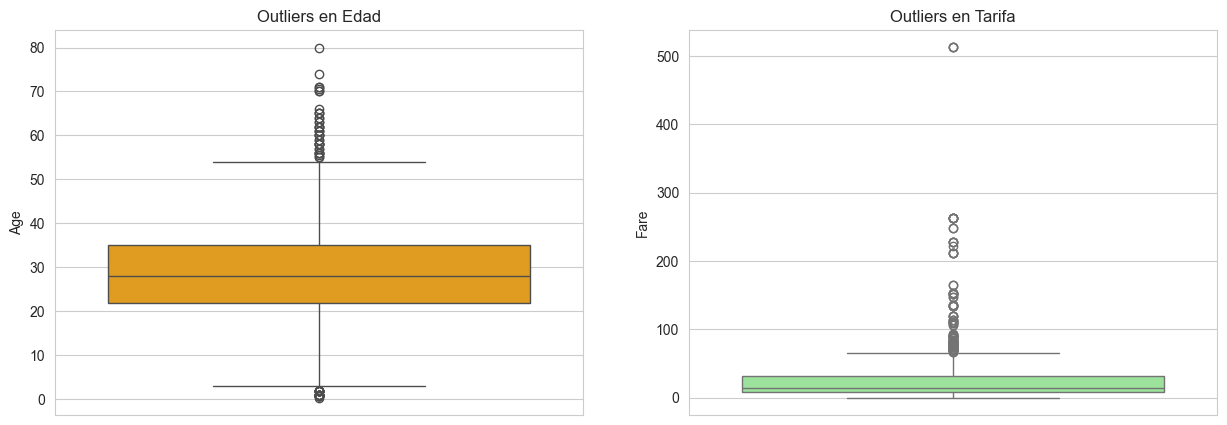

Cantidad de pasajeros con tarifa 0: 15
     Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked      AgeGroup
179         0       3  male  36.0      0      0   0.0        S        Adulto
263         0       1  male  40.0      0      0   0.0        S        Adulto
271         1       3  male  25.0      0      0   0.0        S  Joven Adulto
277         0       2  male  28.0      0      0   0.0        S  Joven Adulto
302         0       3  male  19.0      0      0   0.0        S  Joven Adulto
Edad: Min 0.42, Max 80.0
Tarifa: Min 0.0, Max 512.3292


In [29]:
# --- 1. Agrupar edades y Tasa de supervivencia ---
bins = [0, 2, 12, 18, 35, 60, 100]
labels = ['Infante', 'Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10,5))
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='coolwarm')
plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.show()

# --- 2. Distribución de Edad con Media, Mediana y Moda ---
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f"Media: {df['Age'].mean():.1f}")
plt.axvline(df['Age'].median(), color='green', linestyle='-', label=f"Mediana: {df['Age'].median():.1f}")
plt.axvline(df['Age'].mode()[0], color='black', linestyle=':', label=f"Moda: {df['Age'].mode()[0]:.1f}")
plt.legend()
plt.title('Distribución de Edades con Indicadores Estadísticos')
plt.show()

# --- 3. Boxplot para Outliers (Edad y Tarifa) ---
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(y=df['Age'], ax=ax[0], color='orange').set_title('Outliers en Edad')
sns.boxplot(y=df['Fare'], ax=ax[1], color='lightgreen').set_title('Outliers en Tarifa')
plt.show()

# --- 4. Filtro: Pasajeros con Tarifa 0 ---
pasajeros_gratis = df[df['Fare'] == 0]
print(f"Cantidad de pasajeros con tarifa 0: {len(pasajeros_gratis)}")
# mostrar los primeros 5
print(pasajeros_gratis.head())

# --- 5. Estadísticos rápidos de Edad y Fare ---
print(f"Edad: Min {df['Age'].min()}, Max {df['Age'].max()}")
print(f"Tarifa: Min {df['Fare'].min()}, Max {df['Fare'].max()}")